# 目标：淘宝商城数据源的获取(爬虫)

```
数据清洗：发现与处理缺失值与异常值
数据集成与数据离散化
商品数据分布分析实战
```

# 数据清洗

```
数据清洗：发现与处理缺失值与异常值
缺失值发现：可以查找
异常值发现：画图分析
缺失值处理：均值／中位数插补、固定值、临近插补、回归分析、插值法（拉格朗日插值、牛顿插值）
异常值处理：视为缺失、平均值修正、不处理
```

## 导入数据及初步探索

In [318]:
import numpy as np
import pandas as pd
import pymysql
import matplotlib.pylab as pyl

In [319]:
conn = pymysql.connect(host = '127.0.0.1',user = 'root',passwd = 'jixue',db = 'csdn',charset = 'utf8')
sql = 'select * from taob'
dt = pd.read_sql(sql,conn)

In [320]:
dt_b = dt #备份

In [321]:
dt.shape

(9616, 4)

In [322]:
dt.describe()

,price,comment
count,9616.00000,9616.000000
mean,64.49324,562.239601
std,176.10901,6078.909643
min,0.00000,0.000000
25%,20.00000,16.000000
50%,36.00000,58.000000
75%,66.00000,205.000000
max,7940.00000,454037.000000


In [323]:
dt.comment.quantile(0.25)  #四分位数

16.0

In [324]:
dt.comment.quantile(0.75)

205.0

In [325]:
dt['comment'].median()

58.0

In [326]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9616 entries, 0 to 9615
Data columns (total 4 columns):
title      9616 non-null object
link       9616 non-null object
price      9616 non-null int64
comment    9616 non-null int64
dtypes: int64(2), object(2)
memory usage: 300.6+ KB


## 发现缺失值

In [327]:
dt.columns

Index(['title', 'link', 'price', 'comment'], dtype='object')

In [328]:
(dt['price']==0).value_counts()

False    9572
True       44
Name: price, dtype: int64

In [329]:
dt['price'][dt['price']==0].count()

44

In [330]:
dt[dt['price']==0].head()

,title,link,price,comment
25,【三只松鼠_琥珀核桃仁165gx2袋】坚果特产休闲零食纸皮核桃肉,https://item.taobao.com/item.htm?id=525273256350,0,1006
185,30包邮80后经典怀旧零食 佳龙酱肉丝辣条辣丝 调味小面筋麻辣小吃,https://item.taobao.com/item.htm?id=531797791841,0,174
911,批发童年美食 叉烧樱桃肉 辣条 零食小吃麻辣食品 新品上市,https://item.taobao.com/item.htm?id=44134186067,0,13787
2022,卫龙亲嘴片亲嘴烧辣条辣片面筋怀旧小吃特产零食小面筋100片包邮,https://item.taobao.com/item.htm?id=534303530802,0,484
2039,小食品 素食牛板筋 批发微辣 北京豆腐 面制品 辣条零食小吃 包邮,https://item.taobao.com/item.htm?id=45419115495,0,120


In [331]:
dt['price'].isnull().value_counts()

False    9616
Name: price, dtype: int64

In [332]:
#将价格为0的替换为NaN值
dt.loc[dt['price']==0,'price']=np.nan
dt.loc[dt['price'].isnull(),'price'].head()

25     NaN
185    NaN
911    NaN
2022   NaN
2039   NaN
Name: price, dtype: float64

In [333]:
dt['price'][dt['price'].isnull()].head()

25     NaN
185    NaN
911    NaN
2022   NaN
2039   NaN
Name: price, dtype: float64

In [334]:
#缺失值的数量
dt['price'].isnull().sum()

44

## 缺失值处理

### 将价格为0的数据按平均值64设置

In [335]:
dt.loc[dt['price'].isnull(),'price']=64

In [336]:
dt.loc[dt['price']==64,'price'].head()

25     64.0
185    64.0
505    64.0
911    64.0
939    64.0
Name: price, dtype: float64

### 将价格缺失的删除掉

In [337]:
dt = dt.dropna()

In [338]:
dt.shape

(9616, 4)

### 直接将价格为0的数据替换为平均值64（不必经过NaN步骤）

## 异常值处理

### 画出散点图，找到异常值

In [339]:
dt2 = dt.T

In [340]:
dt2

,0,1,2,3,4,5,6,7,8,9,...,9606,9607,9608,9609,9610,9611,9612,9613,9614,9615
title,买2袋减2元 印尼进口菲那菲娜虾味木薯片油炸大龙虾片零食品400g,零食大礼包送女友一箱整箱好吃的休闲小吃组合混合装生日吃货进口,牛肉干内蒙古牛肉粒特产零食手撕五香牛肉粒干片500g克包邮xo酱烤,爱尝泡鸭爪鸭掌福建龙岩特产下洋土楼卤味零食香辣泡爽泡椒泡爪,30包湖南特产显峰嚼味鱼霸香辣小鱼仔麻辣零食鱼干口水毛毛鱼,11月25日生产 正宗友臣肉松饼2.5kg整箱福建特产糕点心5斤零食品,京辉爱面子点心面27g*20袋干脆面干吃面方便面办公室休闲零食包邮,好吃的手撕风干牛肉干内蒙古牛肉条原味散装零食品特产牛肉干500g,特价进口俄罗斯巧克力kpokaht紫皮糖果婚庆喜糖零食品 原包装2斤,靖江猪肉脯500g小吃特价零食猪肉干猪肉铺猪肉片蜜汁肉干一件包邮,...,韩国进口零食大礼包送女友套餐组合好吃的膨化食品小吃一整箱礼物,湖南特产麻辣豆干零食自制辣条片 手撕豆皮儿时传统小吃100g*3袋,臧老爷子 老北京特产蜜麻花130g/袋 休闲办公室零食品小吃糕点心,童年辣片豆皮辣条80后儿时记忆小吃东北特产240g怀旧小时候的零食,零食80后经典小吃周长江辣条 小豆条 豆干 豆制品 面筋 湖南风味,炭烤鱿鱼足片章鱼150g罐装零食即食海鲜小吃特产,【天天特价】陈吉旺福小麻花500g黑糖零食小吃北京糕点心重庆特产,【褚记】福建小吃福鼎卤鸡翅膀 福鼎特产美食蜜汁鸡翅 真空包装,上好佳粟米条薯片小吃膨化零食品店好吃的的批发大礼包送女友组合,天天特价干吃汤圆爆浆麻薯好吃的糯米糍麻糍米糕小吃糕点特产零食
link,https://item.taobao.com/item.htm?id=44350560220,https://item.taobao.com/item.htm?id=528296696972,https://item.taobao.com/item.htm?id=539655516205,https://item.taobao.com/item.htm?id=520224855651,https://item.taobao.com/item.htm?id=44752472349,https://item.taobao.com/item.htm?id=522922344354,https://item.taobao.com/item.htm?id=537650895010,https://item.taobao.com/item.htm?id=537758670507,https://item.taobao.com/item.htm?id=36834424616,https://item.taobao.com/item.htm?id=528461840334,...,https://item.taobao.com/item.htm?id=539889534536,https://item.taobao.com/item.htm?id=524823773363,https://item.taobao.com/item.htm?id=537861768594,https://item.taobao.com/item.htm?id=530630211293,https://item.taobao.com/item.htm?id=39916577440,https://item.taobao.com/item.htm?id=40681223576,https://item.taobao.com/item.htm?id=537822417971,https://item.taobao.com/item.htm?id=37496942368,https://item.taobao.com/item.htm?id=539180956553,https://item.taobao.com/item.htm?id=533227194958
price,50,116,88,118,40,85,20,158,60,96,...,408,31,4,12,64,20,30,5,1,90
comment,2577,286692,567,30664,6543,1446,592,9878,30834,36183,...,159,3204,4479,14049,1872,706,464,1237,7300,7549


In [341]:
price = dt2.values[2]

In [342]:
price

array([50.0, 116.0, 88.0, ..., 5.0, 1.0, 90.0], dtype=object)

In [343]:
comment = dt['comment']

In [344]:
comment.head()

0      2577
1    286692
2       567
3     30664
4      6543
Name: comment, dtype: int64

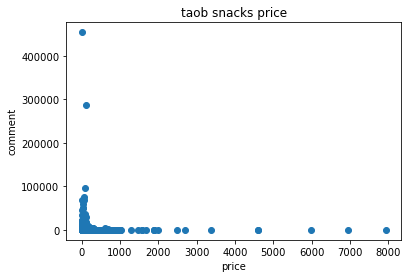

In [345]:
pyl.title('taob snacks price')
pyl.xlabel('price')
pyl.ylabel('comment')
pyl.plot(price,comment,'o')
pyl.show()

### 处理异常数据

将price>1000 & comment>100000的数据进行处理，mean(price)为64，mean(comment)为562

In [346]:
dt['price'][dt['price']>1000].count()

18

In [347]:
dt.loc[dt['price']>1000,'price']=dt['price'].mean()

In [348]:
dt.loc[dt['comment']>100000,'comment']=dt['comment'].mean()

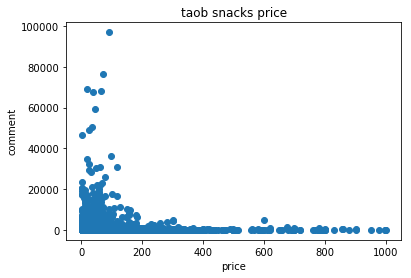

In [349]:
pyl.title('taob snacks price')
pyl.xlabel('price')
pyl.ylabel('comment')
pyl.plot(dt['price'],dt['comment'],'o')
pyl.show()

再将price>400 & comment>20000的数据进行处理，mean(price)为64，mean(comment)为562

In [350]:
dt.loc[dt['price']>400,'price']=dt['price'].mean()

In [351]:
dt.loc[dt['comment']>20000,'comment']=dt['comment'].mean()

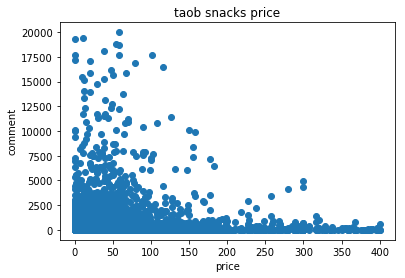

In [352]:
pyl.title('taob snacks price')
pyl.xlabel('price')
pyl.ylabel('comment')
pyl.plot(dt['price'],dt['comment'],'o')
pyl.show()

再将price>150 & comment>5000的数据进行处理，mean(price)为64，mean(comment)为562

In [353]:
dt.loc[dt['price']>150,'price']=dt['price'].mean()

In [354]:
dt.loc[dt['comment']>5000,'comment']=dt['comment'].mean()

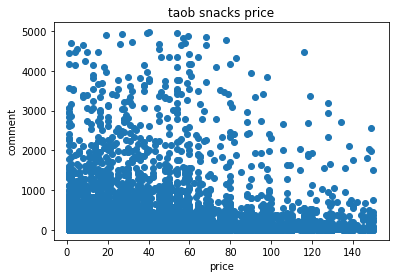

In [355]:
pyl.title('taob snacks price')
pyl.xlabel('price')
pyl.ylabel('comment')
pyl.plot(dt['price'],dt['comment'],'o')
pyl.show()

**评论数近似销量，价格*销量 = 销售额，考虑如何定价能使销售额最大？（矩形最大）**

# 研究数据分布

绘制直方图的步骤：求最值，计算极差，设定组数，求组距

## 绘制价格直方图

In [358]:
pmax = dt['price'].max()
pmin = dt['price'].min()
pdst = (pmax - pmin)/10

In [359]:
psty = np.arange(pmin,pmax,pdst)

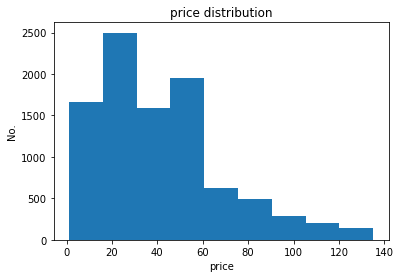

In [360]:
pyl.title('price distribution')
pyl.xlabel('price')
pyl.ylabel('No.')
pyl.hist(dt['price'],psty)
pyl.show()

## 绘制评论直方图

In [361]:
cmax = dt['comment'].max()
cmin = dt['comment'].min()
cdst = (cmax-cmin)/10
csty = np.arange(cmin,cmax,cdst)

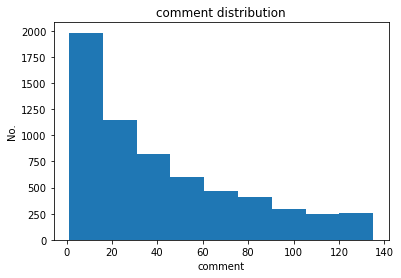

In [362]:
pyl.title('comment distribution')
pyl.xlabel('comment')
pyl.ylabel('No.')
pyl.hist(dt['comment'],psty)
pyl.show()